forecast_set:
[1102.91077156 1072.65142537 1019.68281026 1061.27641238 1073.21553995
 1073.54906494 1092.28955848 1111.38277223 1114.64604964 1122.81825157
 1132.1328063  1129.33878489 1148.81775825 1164.47038195 1135.97419676
 1122.26554069 1088.0381173  1103.52501256 1114.47719641 1121.21642498
 1135.3067806  1149.86521141 1181.42572797 1185.78420663 1157.66248993
 1168.70222773 1170.53874506 1153.16363046 1118.52905598 1115.02040975
 1112.9576678  1070.01739185 1042.53059873 1073.03064833 1021.20590068]
accuracy:  0.9800532923280364
froecast_out: 35


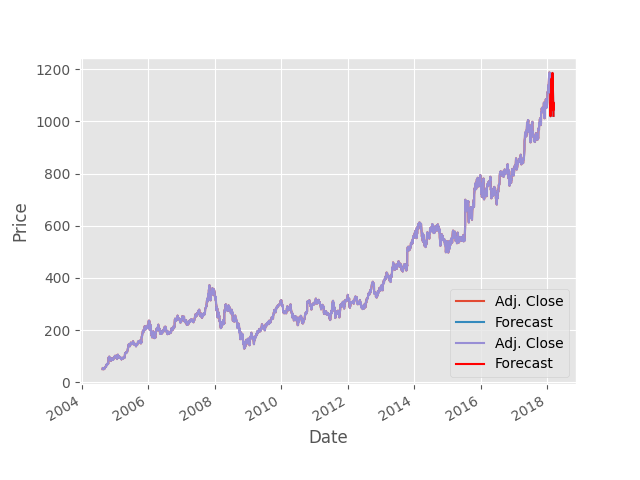

In [2]:
%matplotlib widget
import pandas as pd
import nasdaqdatalink, math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import pprint
style.use('ggplot')
pp = pprint.PrettyPrinter(indent=4)
df = nasdaqdatalink.get("WIKI/GOOGL")
#df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)  # fiill in outlier
forecast_out = int(math.ceil(0.01*len(df)))  # Predict with 1% out the data
df['label'] = df[forecast_col].shift(-forecast_out)  
X = np.array(df.drop(['label'], axis=1))
X_scale = preprocessing.scale (X)
X = X_scale[:-forecast_out]
X_lately = X_scale[-forecast_out:]   
df.dropna (inplace=True)   # Drop any "NaN" rows
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
with open('lnearregression.pickle', 'wb') as f: # We have the object data with pickle.
    pickle.dump (clf, f)
pickle_in = open('lnearregression.pickle', 'rb') # we read object f=with oickle
clf = pickle.load(pickle_in)
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict (X_lately)  # last 30 days
print('forecast_set:'); print(forecast_set)
print('accuracy: ', accuracy); print('froecast_out:', forecast_out)
df['Forecast'] = np.nan
last_date_all = df.iloc[-1]
last_date = df.iloc[-1].name  # row -1 (index of last row). "name" is attribute of API.
last_unix = last_date.timestamp()
one_day = 86400   # 60 x 60 x 24 = 86400sec
next_unix = last_unix + one_day  
for i in forecast_set:
    next_data = datetime.datetime.fromtimestamp (next_unix)
    next_unix += one_day
    df.loc[next_data] = [np.nan for _ in range(len(df.columns) -1)] + [i]
df['Adj. Close'].plot(); df['Forecast'].plot(color='r')
plt.legend(loc=4); plt.xlabel('Date')
plt.ylabel('Price'); plt.show()

forecast_set:
[1102.91077156 1072.65142537 1019.68281026 1061.27641238 1073.21553995
 1073.54906494 1092.28955848 1111.38277223 1114.64604964 1122.81825157
 1132.1328063  1129.33878489 1148.81775825 1164.47038195 1135.97419676
 1122.26554069 1088.0381173  1103.52501256 1114.47719641 1121.21642498
 1135.3067806  1149.86521141 1181.42572797 1185.78420663 1157.66248993
 1168.70222773 1170.53874506 1153.16363046 1118.52905598 1115.02040975
 1112.9576678  1070.01739185 1042.53059873 1073.03064833 1021.20590068]
accuracy:  0.9785822031369874
froecast_out: 35


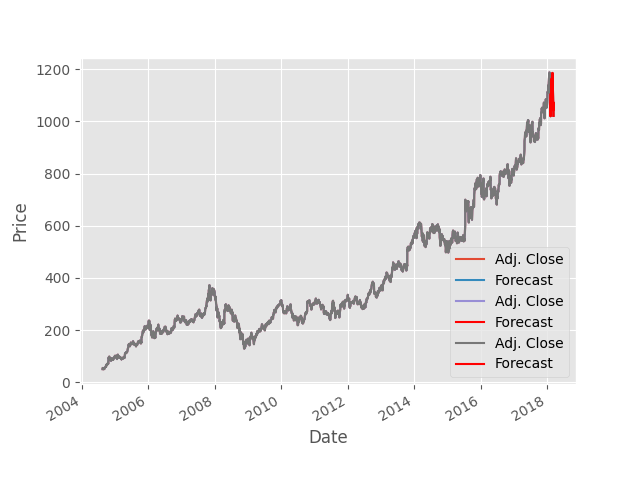

In [3]:
# now, we can just read the same object.
# We don't need to train and save. Just load the file by pickle.
import pandas as pd
import nasdaqdatalink, math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import pprint
style.use('ggplot')
pp = pprint.PrettyPrinter(indent=4)
df = nasdaqdatalink.get("WIKI/GOOGL")
#df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)  # fiill in outlier
forecast_out = int(math.ceil(0.01*len(df)))  # Predict with 1% out the data
df['label'] = df[forecast_col].shift(-forecast_out)  
X = np.array(df.drop(['label'], axis=1))
X_scale = preprocessing.scale (X)
X = X_scale[:-forecast_out]
X_lately = X_scale[-forecast_out:]   
df.dropna (inplace=True)   # Drop any "NaN" rows
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)
#clf = LinearRegression()
#clf.fit(X_train, y_train)
#with open('lnearregression.pickle', 'wb') as f:
#    pickle.dump (clf, f)
pickle_in = open('lnearregression.pickle', 'rb')
clf = pickle.load(pickle_in)
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict (X_lately)  # last 30 days
print('forecast_set:')
print(forecast_set)
print('accuracy: ', accuracy)
print('froecast_out:', forecast_out)
df['Forecast'] = np.nan
last_date_all = df.iloc[-1]
last_date = df.iloc[-1].name  # row -1 (index of last row). "name" is attribute of API.
last_unix = last_date.timestamp()
one_day = 86400   # 60 x 60 x 24 = 86400sec
next_unix = last_unix + one_day  
for i in forecast_set:
    next_data = datetime.datetime.fromtimestamp (next_unix)
    next_unix += one_day
    df.loc[next_data] = [np.nan for _ in range(len(df.columns) -1)] + [i]
df['Adj. Close'].plot(); df['Forecast'].plot(color='r')
plt.legend(loc=4); plt.xlabel('Date')
plt.ylabel('Price'); plt.show()